# Árvore de Decisão

***

## Importando bibliotecas

In [264]:
#Bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

#Classes do modelo de aprendizado
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

#Funções de avaliação dos modelos
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### Dataset Iris

In [265]:
#Carregando o dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/johnattandouglas/monitoria-ml/main/Datasets/Iris.csv")

In [266]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


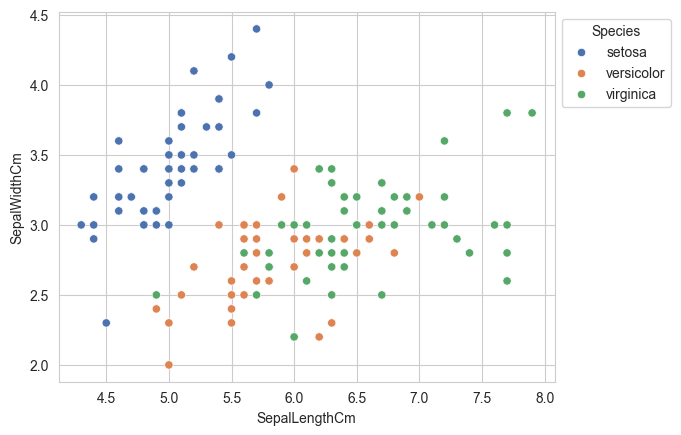

In [267]:
# Distribuição das classes pelas features SepalLengthCm e SepalWidthCm
sns.set_style('whitegrid')
ax = sns.scatterplot(dataset, x='SepalLengthCm',y='SepalWidthCm',
                palette='deep',hue='Species')

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


In [268]:
#Mapeando os valores da classe para inteiro (para fins de visualização da região de decisão)
dataset['Species'] = pd.factorize(dataset['Species'])[0]

# Setosa - 0
# Versicolor - 1
# Virginica - 2

### Separando o conjunto de dados 

In [269]:
#Vamos usar somente duas features SepalLengthCm e SepalWidthCm
X = dataset.loc[:,["SepalLengthCm", "SepalWidthCm"]] 
y = dataset.loc[:,["Species"]]
#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Classificação

[Documentação](https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart)

In [270]:
#scikit-learn usa uma versão otimizada do algoritmo CART (similar ao C4.5)
model = DecisionTreeClassifier(max_depth=3)
#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

#Resultados do classificador
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.56      0.56      0.56         9
           2       0.78      0.82      0.80        17

    accuracy                           0.79        38
   macro avg       0.78      0.77      0.77        38
weighted avg       0.80      0.79      0.79        38



### Região de decisão

In [271]:
def show_decision_region(X, y, model):
    feature_0 = X.columns[0]
    feature_1 = X.columns[1]

    plot_decision_regions(np.array([X[feature_0].values,
                                    X[feature_1].values]).T,
                                    y.values.flatten(), model)
    plt.xlabel(feature_0)
    plt.ylabel(feature_1)

    plt.title(model.__class__.__name__)
    plt.show()

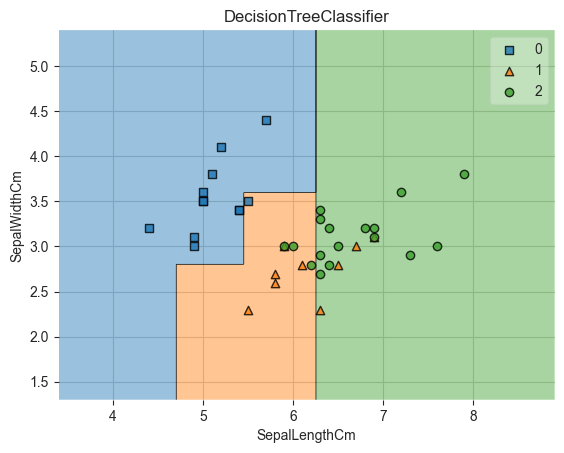

In [272]:
show_decision_region(X_test, y_test, model)

In [273]:
plt.figure(figsize=(100,100))

# Retorna uma lista contendo os dados para as caixas de anotação que compõem a árvore
tree = plot_tree(model, feature_names=["SepalLengthCm", "SepalWidthCm"], 
                 class_names=['setosa', 'versicolor', 'virginica'], filled=True)

### Usando as 4 features

In [274]:
#Vamos usar todas as features
X = dataset.iloc[:,0:4]
y = dataset.iloc[:,-1]
# y = dataset.loc[:,["Species"]]

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [275]:
model = DecisionTreeClassifier()
#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.94      0.94      0.94        17
           2       0.93      0.93      0.93        14

    accuracy                           0.95        38
   macro avg       0.96      0.96      0.96        38
weighted avg       0.95      0.95      0.95        38



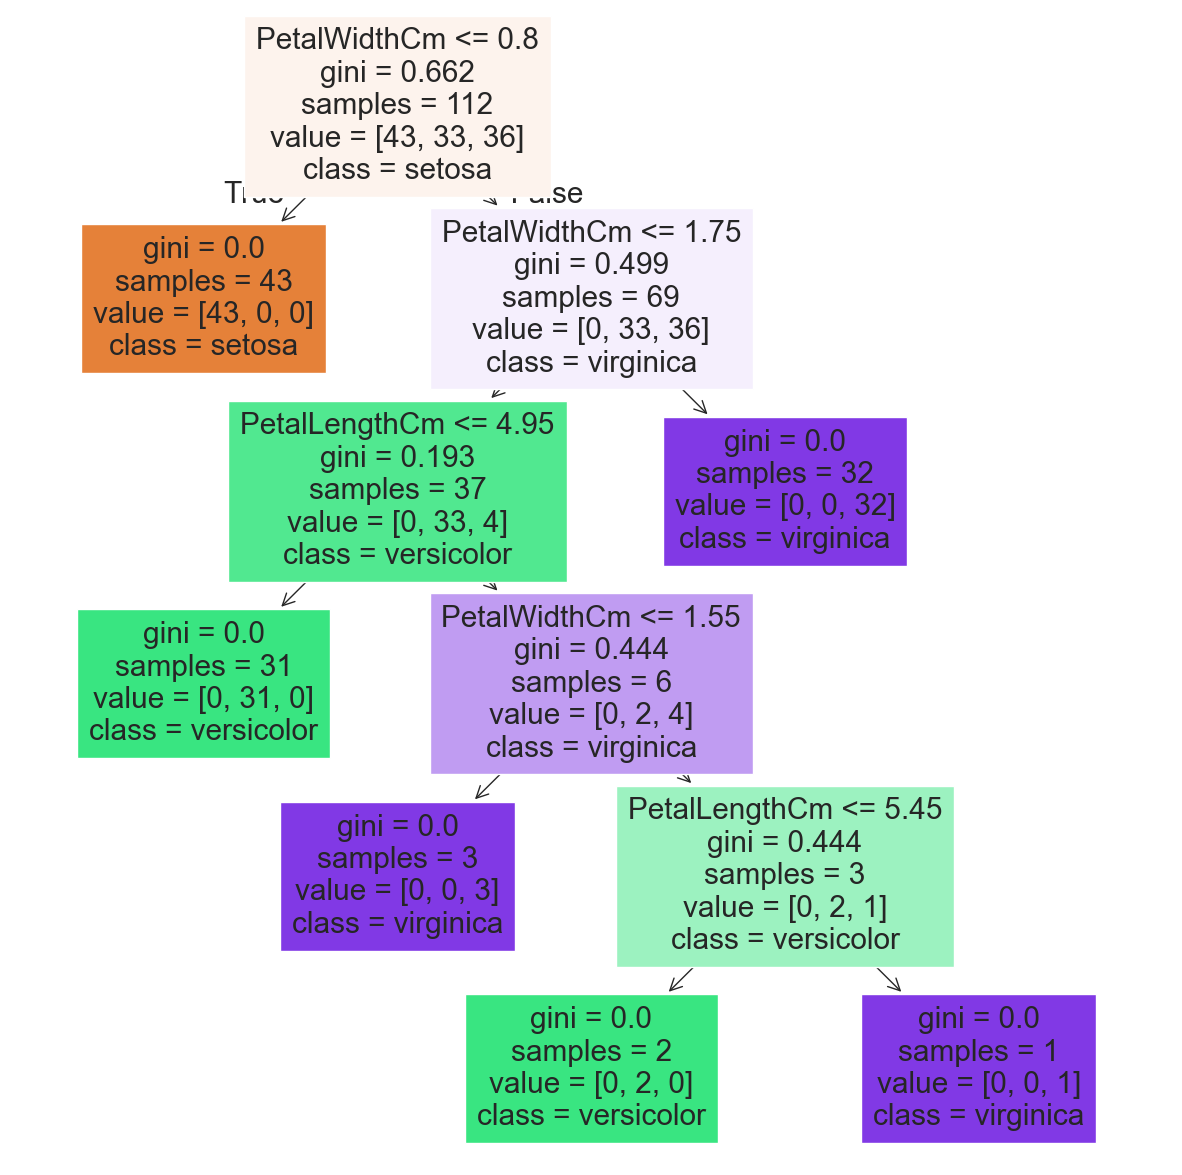

In [276]:
plt.figure(figsize=(15,15))
tree = plot_tree(model, feature_names=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"], 
                 class_names=['setosa', 'versicolor', 'virginica'], filled=True)
plt.show()

### E se mudarmos os parâmetros?

**Criterion** é a função para medir a qualidade de uma divisão. Por padrão o critério usado é o coeficiente gini [Link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).

- coeficiente gini: Mede a probabilidade de uma variável específica ser classificada erroneamente quando escolhida aleatoriamente. $gini(p) = 1-\sum_{i=1}^n (p_i)^2$

- entropia: Entropia é o grau de incerteza, impureza ou desordem de uma variável aleatória ou uma medida de pureza.  
    


In [277]:
for i, criterion in enumerate(['gini', 'entropy']):
    print(criterion.upper()+ "\n")
    model = DecisionTreeClassifier(criterion=criterion, max_depth=4)
    #treinando o modelo
    model.fit(X_train, y_train)    
    
    #predição
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    
plt.show()

GINI

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.94      0.94      0.94        17
           2       0.93      0.93      0.93        14

    accuracy                           0.95        38
   macro avg       0.96      0.96      0.96        38
weighted avg       0.95      0.95      0.95        38

ENTROPY

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.94      0.94      0.94        17
           2       0.93      0.93      0.93        14

    accuracy                           0.95        38
   macro avg       0.96      0.96      0.96        38
weighted avg       0.95      0.95      0.95        38



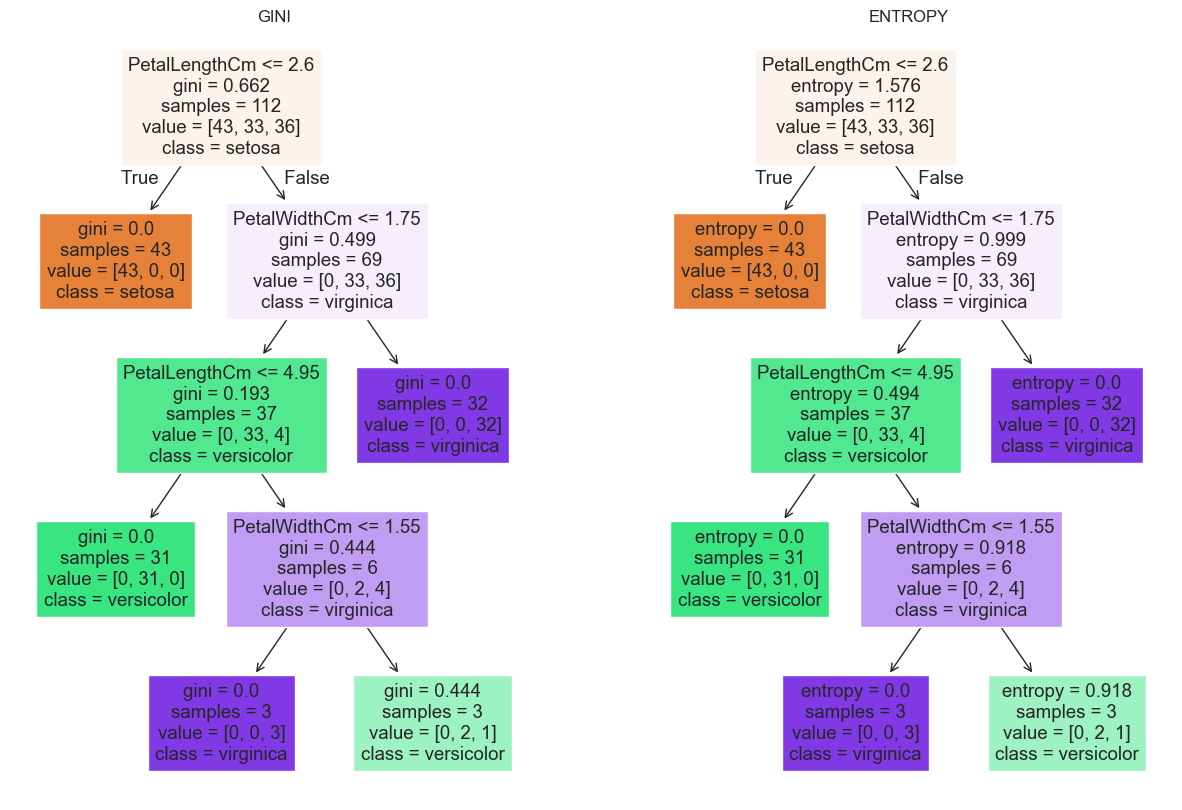

In [278]:
fig, ax = plt.subplots(1,2, figsize=(15,10))

for i, criterion in enumerate(['gini', 'entropy']):
    model = DecisionTreeClassifier(criterion=criterion, max_depth=4)
    #treinando o modelo
    model.fit(X_train, y_train)    
    
    tree = plot_tree(model, ax=ax[i],feature_names=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"],
                 class_names=['setosa', 'versicolor', 'virginica'], filled=True)
    ax[i].set_title(criterion.upper())
plt.show()

**max_depth** determina a profundidade máxima da árvore

In [279]:
for i, max_depth in enumerate([2,3,4]):
    print(f"MAX_DEPTH - {max_depth} \n ")
    model = DecisionTreeClassifier(max_depth=max_depth)
    #treinando o modelo
    model.fit(X_train, y_train)    
    
    #predição
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    
plt.show()

MAX_DEPTH - 2 
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.94      0.94      0.94        17
           2       0.93      0.93      0.93        14

    accuracy                           0.95        38
   macro avg       0.96      0.96      0.96        38
weighted avg       0.95      0.95      0.95        38

MAX_DEPTH - 3 
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.94      0.94      0.94        17
           2       0.93      0.93      0.93        14

    accuracy                           0.95        38
   macro avg       0.96      0.96      0.96        38
weighted avg       0.95      0.95      0.95        38

MAX_DEPTH - 4 
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.94      0.94      0.94        17
           2       0.93 

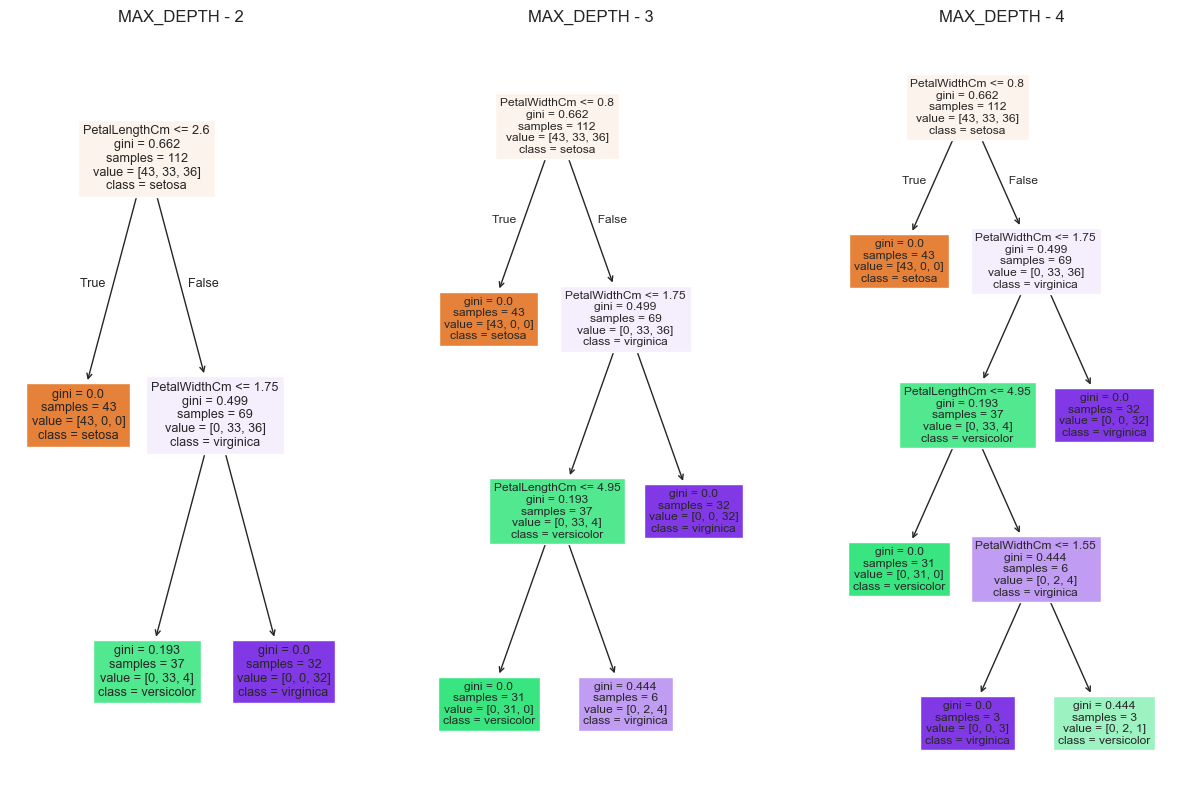

In [280]:
fig, ax = plt.subplots(1,3, figsize=(15,10))

for i, max_depth in enumerate([2,3,4]):
    model = DecisionTreeClassifier(max_depth=max_depth)
    #treinando o modelo
    model.fit(X_train, y_train)    
    
    tree = plot_tree(model, ax=ax[i],feature_names=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"],
                 class_names=['setosa', 'versicolor', 'virginica'], filled=True)
    ax[i].set_title(f"MAX_DEPTH - {max_depth}")
    
plt.show()

Random Forest desempenha melhor do que o DT?

In [281]:
from sklearn.ensemble import RandomForestClassifier

X = dataset.iloc[:, 0:4]
y = dataset.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = RandomForestClassifier(n_estimators=100) 

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.88      0.93         8
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.96      0.96        38
weighted avg       0.98      0.97      0.97        38



## Regressão

**House-16H dataset**:

A tarefa é prever o preço médio da casa na região com base na composição demográfica e no estado do mercado imobiliário na região.

[Saiba mais aqui](https://sci2s.ugr.es/keel/dataset.php?cod=95#sub1)

In [282]:
dataset_R = pd.read_csv("https://raw.githubusercontent.com/johnattandouglas/monitoria-ml/main/Datasets/house.csv")

In [283]:
dataset_R.head()

,Price,P1,P5p1,P6p2,P11p4,P14p9,P15p1,P15p3,P16p2,P18p2,P27p4,H2p2,H8p2,H10p1,H13p1,H18pA,H40p4
0,14999,219,0.506849,0.031963,0.146119,0.101852,0.876712,0.000000,0.746988,0.012048,0.060241,0.231482,0.024096,0.987952,0.351852,0.000000,0.800000
1,106200,2273,0.495381,0.018918,0.067312,0.045336,0.794545,0.016718,0.641053,0.002105,0.076842,0.064961,0.017895,0.997895,0.170276,0.054217,0.258064
2,14999,564,0.457447,0.058511,0.299645,0.238562,0.764184,0.010638,0.567273,0.003636,0.014545,0.140625,0.054545,0.996364,0.381250,0.056180,1.000000
3,29900,620,0.495161,0.003226,0.104839,0.086262,0.909677,0.000000,0.792793,0.009009,0.027027,0.051282,0.004504,0.995495,0.183761,0.162791,0.000000
4,85900,3809,0.491730,0.205303,0.107115,0.085744,0.899449,0.000000,0.766566,0.008283,0.039910,0.017024,0.200301,0.985693,0.198372,0.106557,0.666667


In [284]:
X = dataset_R.iloc[:,1:-1] 
y = dataset_R.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [285]:
regression_tree = DecisionTreeRegressor(max_depth=3)
regression_tree.fit(X_train, y_train)

y_pred = regression_tree.predict(X_test)

#Coeficiente de determinação - melhor valor é 1
print("R2_score:", r2_score(y_test, y_pred))

R2_score: 0.3436121143422818


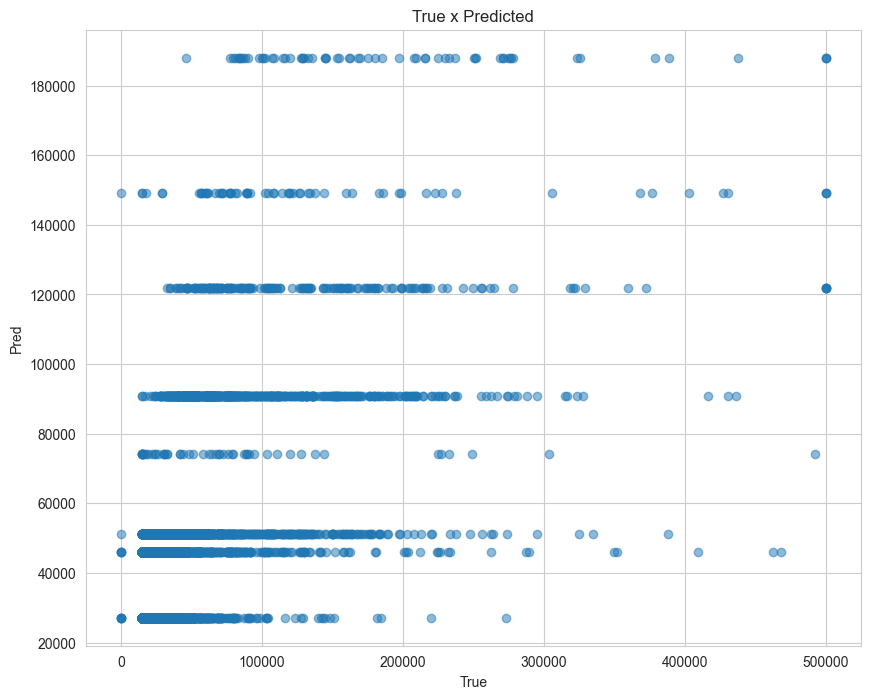

In [286]:
plt.figure(figsize=(10,8))
ax = plt.axes()
ax.scatter(y_test, y_pred, alpha=0.5)

ax.set_xlabel('True')
ax.set_ylabel('Pred')
plt.title("True x Predicted")

plt.show()

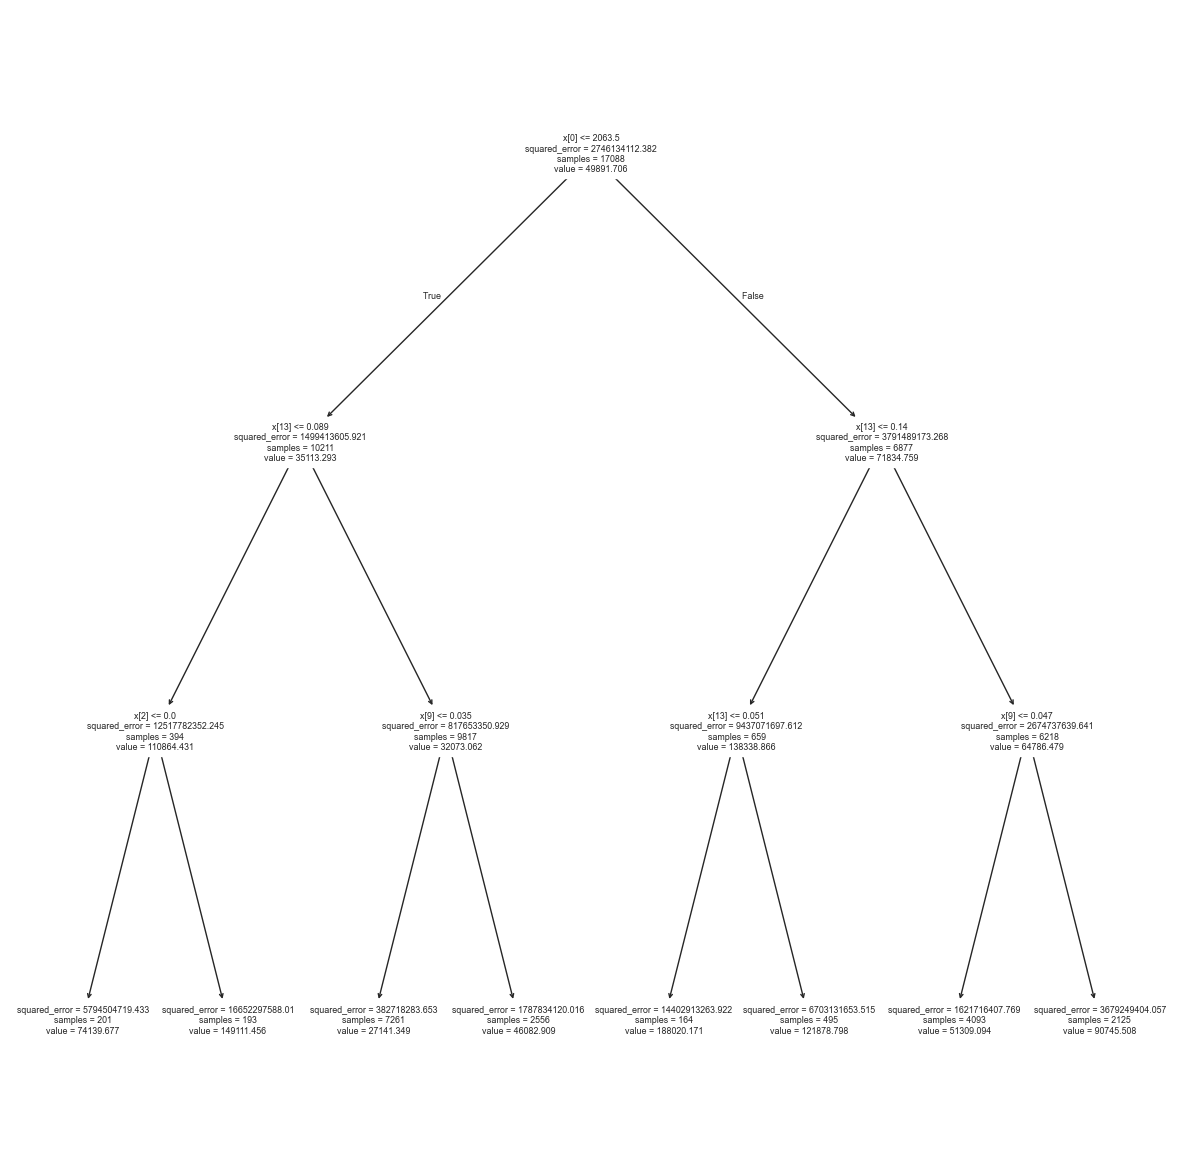

In [287]:
plt.figure(figsize=(15,15))
_ = plot_tree(regression_tree)

E se aumentarmos a profundidade da árvore?